__Import Packages__

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

__Load and Convert data__

In [26]:
faces = np.load('./data/faces.npy')
ages = np.load('./data/ages.npy')
print(faces.shape)
print(ages.shape)

(7500, 48, 48)
(7500,)


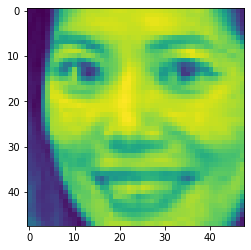

In [31]:
img_index = 2020
plt.imshow(faces[img_index])

In [30]:
np.random.seed(2020)
faces = np.random.permutation(faces)
np.random.seed(2020)
ages = np.random.permutation(ages)

In [32]:
faces = faces.astype('float32') / 255
faces = faces.reshape((faces.shape[0], 48, 48, 1))
ages = tf.keras.utils.to_categorical(ages)

In [33]:
faces_train = faces[0:6000]
faces_val = faces[6000:]
ages_train = ages[0:6000]
ages_val = ages[6000:]

__Build the Model__

In [38]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), padding='same', activation='relu', input_shape=(48,48,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(101, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 16)        80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 32)       

In [39]:
# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
# train the model
model.fit(faces_train,
          ages_train,
          batch_size=64,
          epochs=10,
          validation_data=(faces_val, ages_val))

Train on 6000 samples, validate on 1500 samples
Epoch 1/10
6000/6000 [==============================] - 0s 76us/sample - loss: 2.5828 - accuracy: 0.2853 - val_loss: 4.0814 - val_accuracy: 0.0627
Epoch 2/10
6000/6000 [==============================] - 0s 74us/sample - loss: 2.5841 - accuracy: 0.2865 - val_loss: 4.0863 - val_accuracy: 0.0667
Epoch 3/10
6000/6000 [==============================] - 0s 74us/sample - loss: 2.5399 - accuracy: 0.2908 - val_loss: 4.1319 - val_accuracy: 0.0673
Epoch 4/10
6000/6000 [==============================] - 0s 72us/sample - loss: 2.4744 - accuracy: 0.3128 - val_loss: 4.1887 - val_accuracy: 0.0593
Epoch 5/10
6000/6000 [==============================] - 0s 73us/sample - loss: 2.4384 - accuracy: 0.3223 - val_loss: 4.1216 - val_accuracy: 0.0580
Epoch 6/10
6000/6000 [==============================] - 0s 72us/sample - loss: 2.3879 - accuracy: 0.3315 - val_loss: 4.1923 - val_accuracy: 0.0600
Epoch 7/10
6000/6000 [==============================] - 0s 76us/sample

In [20]:
score = model.evaluate(faces_val, ages_val, verbose=0)

In [21]:
score[1]

0.06533334

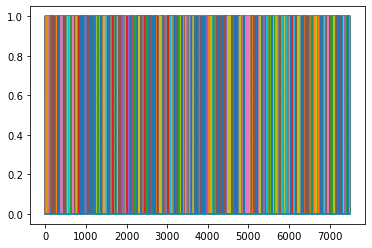

In [24]:
plt.plot(ages.)